# Pipe 4

Notebook contains scripts for visualizing kinematic data.

Inputs files must be `.csv` file output by `analysis.ipynb`.

_Note that these `.csv` files are different from those generated by `rtklib-pos-to-csv.ipynb` as they have different headers._

In [101]:
import plotly.express as px
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splprep, splev, BSpline
import csv
import plotly

%matplotlib inline
from pyubx2 import UBXReader

from constants import *

In [102]:
INPUT_FILEPATH = "/home/delaynie/Documents/rtklib-workspace/cmubuggy-datalogger/data/calc-csv/"
OUTPUT_FILEPATH = "/home/delaynie/Documents/rtklib-workspace/cmubuggy-datalogger/data/plots/"

In [103]:
def plot_map(df, outputFilepath):
    layers = [{"below": "traces",
               "sourcetype": "raster",
               "source": ["https://imagery.pasda.psu.edu/arcgis/rest/services/pasda/PEMAImagery2018_2020/MapServer/WMTS/tile/1.0.0/pasda_PEMAImagery2018_2020/default/default028mm/{z}/{y}/{x}.png"]}]

    fig = px.scatter_mapbox(df,
                            lat="latitude", lon="longitude",
                            color="speed",
                            hover_data=["altitude",
                                        "acceleration_magnitude",
                                        "timestamp",
                                        "timestamp_str"],
                            zoom=15, size_max=18,
                            height=400, width=800)

    fig.update_layout(
        mapbox_style="white-bg",
        mapbox_layers=layers
    )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    plotly.offline.plot(fig, filename=outputFilepath)

In [104]:
def plot_speed_graph(df, outputFilepath):
    plt.figure().set_figwidth(15)
    plt.plot(df["timestamp"], df["speed"])
    plt.show()
    plt.savefig(outputFilepath)

def plot_accel_graph(df, outputFilepath):
    plt.figure().set_figwidth(15)
    plt.plot(df["timestamp"], df["acceleration_magnitude"])
    plt.show()
    plt.savefig(outputFilepath)

In [105]:
df = pd.read_csv(f"{INPUT_FILEPATH}output1.csv")

In [106]:
plot_map(df, f"{OUTPUT_FILEPATH}pchip-map.html")

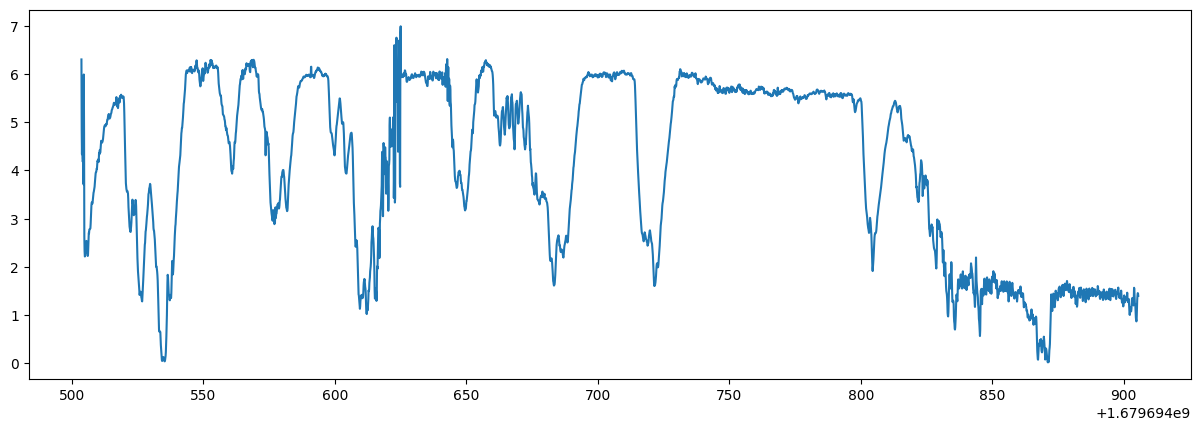

<Figure size 640x480 with 0 Axes>

In [107]:
plot_speed_graph(df, f"{OUTPUT_FILEPATH}pchip-speed.png")

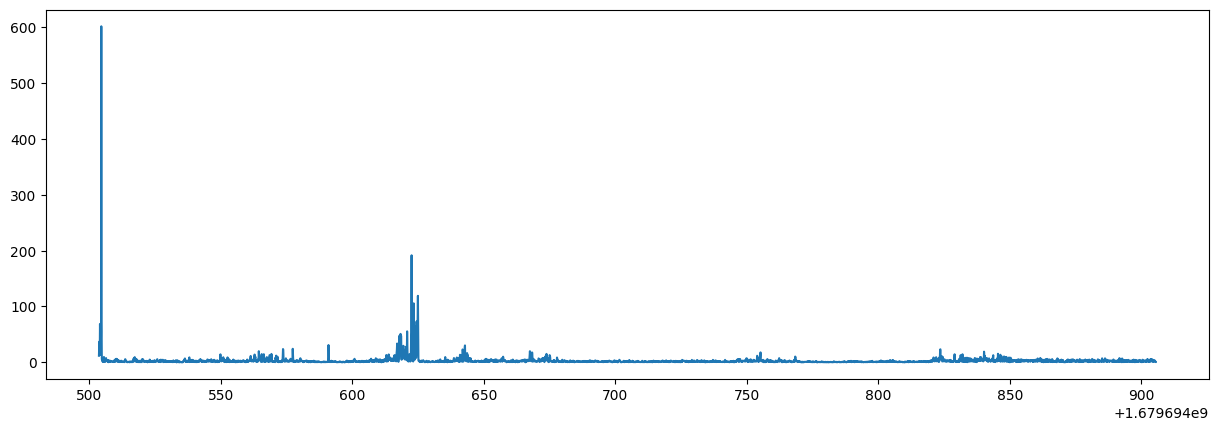

<Figure size 640x480 with 0 Axes>

In [108]:
plot_accel_graph(df, f"{OUTPUT_FILEPATH}pchip-accel.png")

In [109]:
df[df.speed == df["speed"].max()]

,Unnamed: 0,timestamp,timestamp_str,fix_type,latitude,latitude_processed,longitude,longitude_processed,altitude,velocity,speed,acceleration_vector,acceleration_magnitude,horizontal_accuracy,vertical_accuracy,speed_accuracy
1205,1205,1.679695e+09,2023/03/24 17:50:25.000,1,40.445286,-349.051618,-79.95338,778.47882,245.8657,"[-4.636382671962046, -5.223405195460707]",6.984268,"[18.4112989304816, 44.05331616602284]",47.745896,NaN,NaN,NaN
